In [1]:
import numpy as np               # el módulo numpy se asocia con alias np
import time                      # módulo de gestión del tiempo
import cv2                       # módulo de OpenCV
# las siguientes librerías permiten mostrar imágenes en el cuaderno
import matplotlib                # módulo de visualización
import matplotlib.pyplot as plt  # el módulo matplotlib.pyplot con alias plt
from IPython.display import clear_output, Image, display, HTML  
#import tools_creaVideo as crea   # módulo para generar imágenes virtuales
import ipywidgets as widgets     # funcionalidad de interacción con las gráficas
from matplotlib import rcParams
import os
import random

# Separar datos de Entrenamiento y Validación

In [2]:

X = np.load('x_data.npy')
Y = np.load('y_data.npy')

random_shuffle = np.arange(55)
np.random.shuffle(random_shuffle)

X_shuffle = X[:,random_shuffle]
Y_shuffle = Y[random_shuffle]

X_train = X_shuffle[:,:40]
Y_train = Y_shuffle[:40]
X_test = X_shuffle[:,40:]
Y_test = Y_shuffle[40:]

m = X_train.shape[1]
n = X_train.shape[0]

In [3]:
X.shape

(48400, 55)

0 .Es un/a: garbanzo


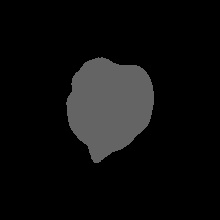

In [4]:
#Rolling an image
num = random.randint(0, 40)
x = X_train[:,num]
img = x.reshape(220,220)
print(str(num)+' .Es un/a: '+(1-int(Y_train[num]))*'garbanzo'+int(Y_train[num])*'habichuela')
Image(cv2.imencode('.jpg', img*100)[1])

# Funciones Red Neuronal

In [5]:
#Sigmoid activation
def sigmoid(z):
    sigmoid = 1/(1+np.exp(-z))
    return sigmoid

In [6]:
#Relu activation
def relu(z):
    relu = np.maximum(0,z)
    return relu

In [7]:
#Relu derivative
def reluDerivative(z):
    z[z<=0] = 0
    z[z>0] = 1
    return z

In [8]:
#Initialization
def initialization(n_h):

    #W1 = np.random.randn(n_h,n)*0.01
    W1 = np.random.randn(n_h,n)*np.sqrt(1./n)#xavier inicialitation
    b1 = np.zeros((n_h,1))
    #W2 = np.random.randn(1,n_h)*0.01
    W2 = np.random.randn(1,n_h)*np.sqrt(1./n)#xavier inicialitation
    b2 = np.zeros((1,1))
    
    return W1, b1, W2, b2

In [9]:
#Forward propagation
def forward(X, Y, W1, b1, W2, b2):
    Z1 = np.dot(W1,X)+b1
    #A1 = relu(Z1)
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    
    cost = -1/m*sum(sum(Y*np.log(A2)+(1-Y)*np.log(1-A2)))
    
    return cost, Z1, A1, Z2, A2

In [10]:
#Backward propagation
def backward(X, Y, W1, b1, W2, b2, Z1, A1, Z2, A2):
    
    dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
    
    dZ2 = dA2*(sigmoid(Z2)*(1-sigmoid(Z2)))
    dW2 = 1/m*np.dot(dZ2,A1.T)
    db2 = 1/m*np.sum(dZ2,axis=1,keepdims=True)
    
    dA1 = np.dot(W2.T,dZ2)
    
    #dZ1 = dA1*reluDerivative(Z1)
    dZ1 = dA1*(sigmoid(Z1)*(1-sigmoid(Z1)))
    dW1 = 1/m*np.dot(dZ1,X.T)
    db1 = 1/m*np.sum(dZ1,axis=1,keepdims=True)
    
    return dW1, db1, dW2, db2

In [11]:
#predict output
def predict(X, W1, b1, W2, b2):
    Y = sigmoid(np.dot(W2,sigmoid(np.dot(W1,X)+b1))+b2)
    predict = Y > 0.5 #vector bolean output
    return predict

# Entrenamiento de la Red Neuronal

iteration: 10  Cost: 0.6016358608653004  Train accuracy: 62.5%
iteration: 20  Cost: 0.44225384484230407  Train accuracy: 62.5%
iteration: 30  Cost: 0.3492191393407745  Train accuracy: 87.5%
iteration: 40  Cost: 0.2953519495678859  Train accuracy: 90.0%
iteration: 50  Cost: 0.25818183967619945  Train accuracy: 100.0%
iteration: 60  Cost: 0.2296128908899628  Train accuracy: 100.0%
iteration: 70  Cost: 0.20646527845423238  Train accuracy: 100.0%
iteration: 80  Cost: 0.18717801858538746  Train accuracy: 100.0%
iteration: 90  Cost: 0.17083106923782515  Train accuracy: 100.0%
iteration: 100  Cost: 0.15681050397602603  Train accuracy: 100.0%
Tiempo de entrenamiento: 1.5657269954681396 seg


Text(0.5, 0, 'iterations')

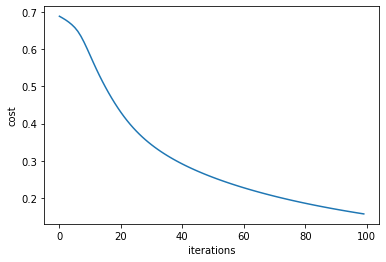

In [12]:
#Training the NN
n_h = 10 #hidden layer neurons
iterations = 100
costs = np.zeros(iterations)
accuracys_train = np.zeros(iterations)
accuracys_test = np.zeros(iterations)

tick = time.time()
W1, b1, W2, b2 = initialization(n_h)
cost , Z1, A1, Z2, A2 = forward(X_train, Y_train, W1, b1, W2, b2)
for iteration in range(iterations):
    dW1, db1, dW2, db2 = backward(X_train, Y_train, W1, b1, W2, b2, Z1, A1, Z2, A2)
    #gradient descend
    alfa = 0.1
    W1 = W1 - alfa*dW1
    b1 = b1 - alfa*db1
    W2 = W2 - alfa*dW2
    b2 = b2 - alfa*db2
    
    cost, Z1, A1, Z2, A2 = forward(X_train, Y_train, W1, b1, W2, b2)
    costs[iteration]=cost
    accuracys_train[iteration] = (m - int(np.sum(Y_train - predict(X_train, W1, b1, W2, b2), axis=1))) / m
    accuracys_test[iteration] = (X_test.shape[1] - int(np.sum(Y_test - predict(X_test, W1, b1, W2, b2), axis=1))) / X_test.shape[1]
    if (iteration+1)%10 == 0:
        print('iteration: '+str(iteration+1)+'  Cost: '+str(cost)+'  Train accuracy: '+str(accuracys_train[iteration]*100)+'%')    
    
tock = time.time()
print('Tiempo de entrenamiento: '+str(tock-tick)+' seg')
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')

## Tasa de exito

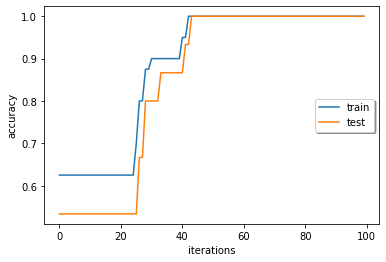

In [13]:
plt.plot(accuracys_train, label='train')
plt.plot(accuracys_test, label='test')
plt.ylabel('accuracy')
plt.xlabel('iterations')
legend = plt.legend(loc='right', shadow=True)
frame = legend.get_frame()
#frame.set_facecolor('0.90')

10. Es un/a: habichuela


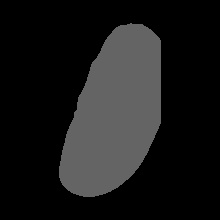

In [14]:
#Evaluate some examples
num = random.randint(0, 15)
x = X_test[:,num].reshape(48400,1)
img = x.reshape(220,220)

#a2 = sigmoid(np.dot(W2,sigmoid(np.dot(W1,x)+b1))+b2)
#prob = a2 > 0.5
prediction = predict(x, W1, b1, W2, b2)

print(str(num+1)+'. Es un/a: '+(1-int(prediction))*'garbanzo'+int(prediction)*'habichuela')
Image(cv2.imencode('.jpg', img*100)[1])

In [209]:
#save de data
'''
np.save('data_NN/W1',W1)
np.save('data_NN/W2',W2)
np.save('data_NN/b1',b1)
np.save('data_NN/b2',b2)
'''